# MISSING VALUES FEATURE ENGINEERING

In [70]:
import pandas as pd 
import numpy as np  

In [72]:
df = pd.read_csv('titanic_train.csv')

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [76]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_null       0
dtype: int64

In [78]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [80]:
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [84]:
df['Cabin_null'].mean()

0.7710437710437711

#### Mean of values maping to survived from cabin_null
select avg(cabin_null)
from titanic_train
groupby survived;

In [86]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

### Techniques of handling missing values
1. Mead/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent categories Imputation

### Continous Variables

#### Mean Median Mode Imputation

In [88]:
df1 = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [90]:
df1.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [92]:
def impute_nan(df,variable,median):
    df[variable + "_median"] = df[variable].fillna(median)

In [94]:
df.Age.median()

28.0

In [96]:
df.Age.mean()

29.69911764705882

In [98]:
df.Age.mode()

0    24.0
dtype: float64

In [100]:
impute_nan(df1,'Age',df.Age.median())

In [102]:
df1.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [104]:
df1.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
dtype: float64

In [106]:
df1.Age.std()

14.526497332334042

In [108]:
df1.Age_median.std()

13.019696550973201

In [110]:
import matplotlib.pyplot as plt 
%matplotlib inline

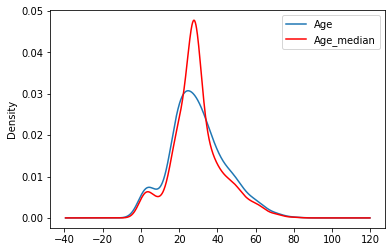

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1.Age.plot(kind='kde',ax=ax)
df1.Age_median.plot(kind='kde',ax=ax,color='red')
# df1.Age_mean.plot(kind='kde',ax=ax,color='green')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [114]:
# impute_nan(df1,'Age',df1.Age.mean())

In [116]:
df1.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [118]:
# df1.Age_mean.std()

#### Random Sample Imputation

In [120]:
df2 = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [122]:
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [124]:
df2.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

In [126]:
# Replacing NAN with random values 
df2.Age.dropna().sample(df2.Age.isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [128]:
def impute_nan(df,variable,median):
    df[variable + "_median"] = df[variable].fillna(median)
    df[variable + "_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state = 0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [130]:
impute_nan(df2,'Age',df2.Age.median())

In [132]:
df2.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [134]:
df2.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

### Our Distribution is almost same and ovelapping over the curve

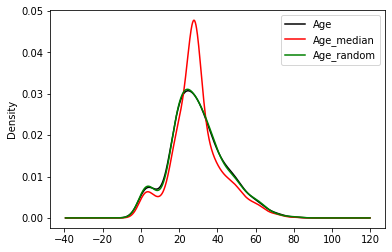

In [136]:
fig = plt.figure()
ax = fig.add_subplot(111)
df2.Age.plot(kind='kde',ax=ax,color='black')
df2.Age_median.plot(kind='kde',ax=ax,color='red')
df2.Age_random.plot(kind='kde',ax=ax,color='green')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [138]:
print(df2.Age.std())
print(df2.Age_median.std())
print(df2.Age_random.std())

14.526497332334042
13.019696550973201
14.56365408956869


#### Capturing NAN values with a new feature

In [140]:
df3 = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [142]:
df3['Age_NAN'] = np.where(df3['Age'].isnull(),1,0)

In [144]:
df3.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


#### End of Distribution Imputation

In [146]:
df4 = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

<AxesSubplot:>

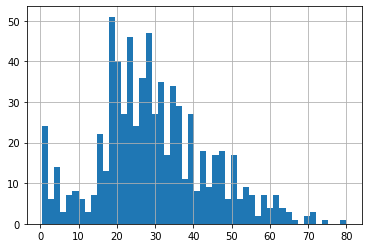

In [148]:
df4.Age.hist(bins=50)

In [150]:
df4.Age.mean()

29.69911764705882

In [152]:
df4.Age.mean() + 3*df4.Age.std()

68.42067214450209

<AxesSubplot:xlabel='Age'>

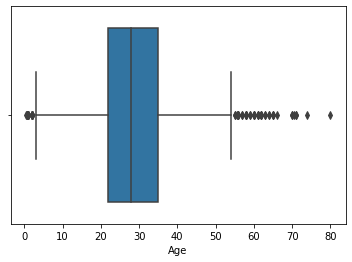

In [154]:
import seaborn as sns
sns.boxplot('Age',data=df4)

In [156]:
def impute_nan(df,variable,median,extreme):
    df[variable + "_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [158]:
impute_nan(df4,'Age',df4.Age.median(),df4.Age.mean() + 3*df4.Age.std())

In [160]:
df4.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [162]:
print(df.Age.std())
print(df4.Age.std())
print(df4.Age_end_distribution.std())

14.526497332334042
13.019696550973201
13.019696550973201


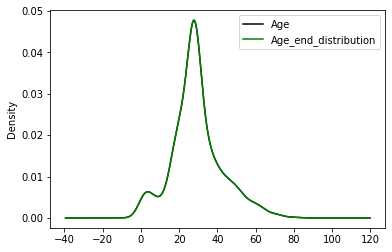

In [164]:
fig = plt.figure()
ax = fig.add_subplot(111)
df4.Age.plot(kind='kde',ax=ax,color='black')
# df4.Age_median.plot(kind='kde',ax=ax,color='red')
df4.Age_end_distribution.plot(kind='kde',ax=ax,color='green')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<AxesSubplot:xlabel='Age_end_distribution'>

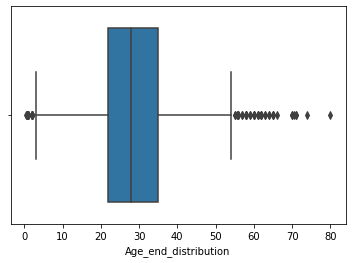

In [166]:
sns.boxplot('Age_end_distribution',data=df4)

#### Arbitrary Value Imputation

In [168]:
df5 = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [170]:
df5.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [172]:
def impute_nan(df,variable):
    df[variable + '_hundred'] = df[variable].fillna(100)
    df[variable + '_zero'] = df[variable].fillna(0)

In [174]:
impute_nan(df5,'Age')

In [176]:
df5.head()

,Survived,Age,Fare,Age_hundred,Age_zero
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


### Categorical Variables

#### Frequent Category Imputation

In [178]:
df6 = pd.read_csv('housing_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [180]:
df6.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [182]:
df6.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

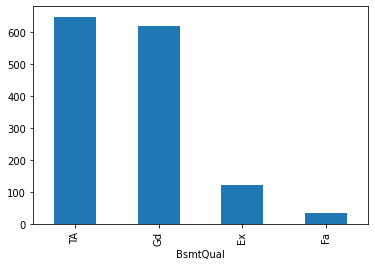

In [184]:
df6.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='GarageType'>

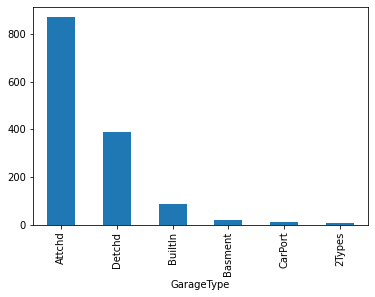

In [186]:
df6.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='FireplaceQu'>

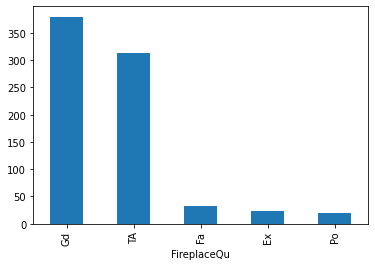

In [188]:
df6.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False).plot.bar()

In [190]:
def impute_nan(df,variable):
    df[variable + '_mode'] = df[variable].fillna(df[variable].value_counts().index[0])

In [191]:
impute_nan(df6,'BsmtQual')
impute_nan(df6,'GarageType')

In [192]:
df6.isnull().sum()

BsmtQual            37
FireplaceQu        690
GarageType          81
SalePrice            0
BsmtQual_mode        0
GarageType_mode      0
dtype: int64

#### Replacing NAN with one new category

In [194]:
df7 = pd.read_csv('housing_train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [195]:
def impute_nan(df,variable):
    df[variable + '_new'] = np.where(df[variable].isnull(),'Missing',df[variable])

In [196]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df7,feature)

In [198]:
df7.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [199]:
df7 = df7.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [200]:
df7.head()

,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


In [201]:
df7.isnull().sum()

SalePrice          0
BsmtQual_new       0
FireplaceQu_new    0
GarageType_new     0
dtype: int64